# Xây dựng các mô hình dự đoán giá cước Taxi

## 1. Mô hình Linear Regression

### Kiểm tra tham số mặc định của LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
from inspect import signature

# Hiển thị tham số mặc định
print('Tham số mặc định của LinearRegression:')
print(signature(LinearRegression))

# Tạo instance và hiển thị tất cả thuộc tính
model = LinearRegression()
print('\nTất cả thuộc tính của LinearRegression:')
for param, value in model.get_params().items():
    print(f'{param}: {value}')

Tham số mặc định của LinearRegression:
(*, fit_intercept=True, copy_X=True, tol=1e-06, n_jobs=None, positive=False)

Tất cả thuộc tính của LinearRegression:
copy_X: True
fit_intercept: True
n_jobs: None
positive: False
tol: 1e-06


=== ĐỌC DỮ LIỆU ĐÃ XỬ LÝ ===
Số lượng bản ghi: 189405

=== CHUẨN BỊ DỮ LIỆU ===
Kích thước tập train: (151524, 7)
Kích thước tập test: (37881, 7)

=== HUẤN LUYỆN MÔ HÌNH LINEAR REGRESSION ===
Bắt đầu huấn luyện mô hình...
Hoàn thành huấn luyện mô hình

Thực hiện dự đoán trên tập test...

=== ĐÁNH GIÁ MÔ HÌNH ===
MSE: 12.5005
RMSE: 3.5356
R² Score: 0.7410
MAPE: 20.4952%

=== VISUALIZE KẾT QUẢ ===
Số lượng bản ghi: 189405

=== CHUẨN BỊ DỮ LIỆU ===
Kích thước tập train: (151524, 7)
Kích thước tập test: (37881, 7)

=== HUẤN LUYỆN MÔ HÌNH LINEAR REGRESSION ===
Bắt đầu huấn luyện mô hình...
Hoàn thành huấn luyện mô hình

Thực hiện dự đoán trên tập test...

=== ĐÁNH GIÁ MÔ HÌNH ===
MSE: 12.5005
RMSE: 3.5356
R² Score: 0.7410
MAPE: 20.4952%

=== VISUALIZE KẾT QUẢ ===


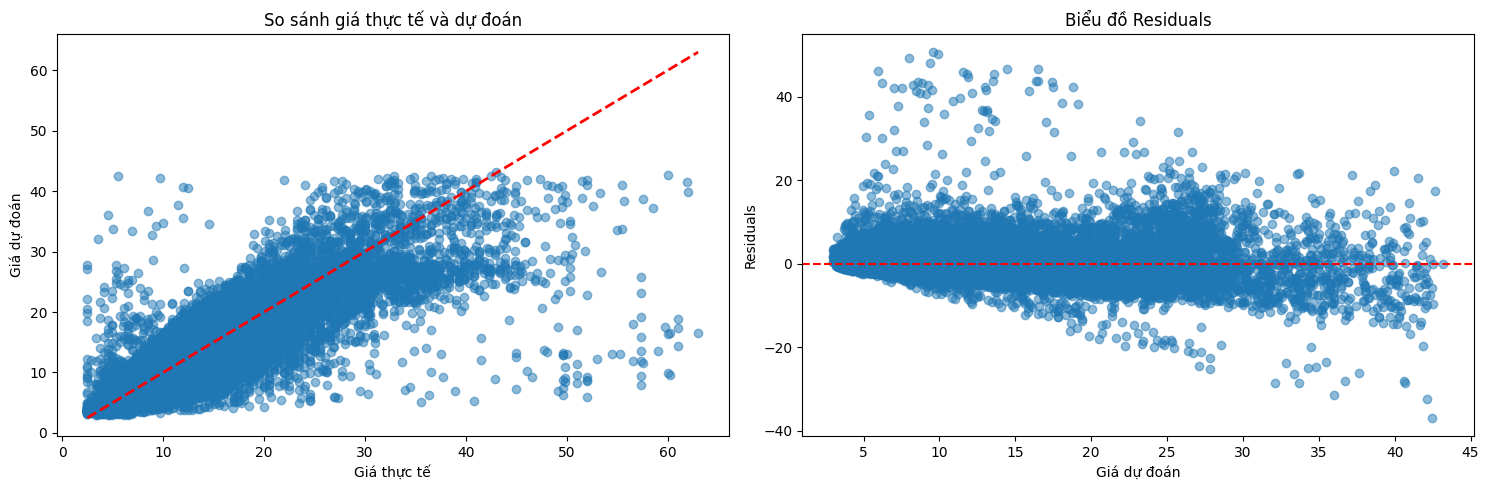


=== HỆ SỐ CỦA CÁC FEATURES ===

Hệ số của các features:
           Feature  Coefficient
1    trip_distance     2.338702
6     is_rush_hour     0.390118
0  passenger_count     0.055104
4            month     0.038853
2             hour     0.012855
3              day    -0.001037
5       is_weekend    -0.379686


<Figure size 1000x600 with 0 Axes>

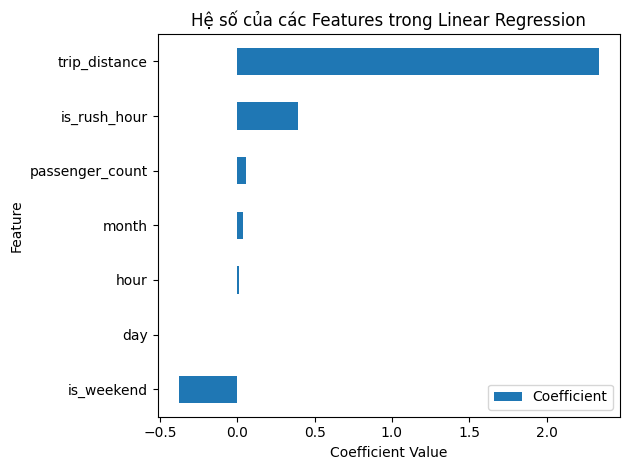

In [12]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu đã được tiền xử lý
print("=== ĐỌC DỮ LIỆU ĐÃ XỬ LÝ ===")
df = pd.read_csv(r'd:\predict taxi fares\uber_cleaned.csv')
print("Số lượng bản ghi:", len(df))

# Chuẩn bị features và target
print("\n=== CHUẨN BỊ DỮ LIỆU ===")
# Chọn các features đã được xử lý đa cộng tuyến
features = [
    'passenger_count', 'trip_distance',
    'hour', 'day', 'month',
    'is_weekend', 'is_rush_hour'
]

X = df[features]
y = df['fare_amount']

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)

# Xây dựng và huấn luyện mô hình
print("\n=== HUẤN LUYỆN MÔ HÌNH LINEAR REGRESSION ===")
model = LinearRegression()
print("Bắt đầu huấn luyện mô hình...")
model.fit(X_train, y_train)
print("Hoàn thành huấn luyện mô hình")

# Dự đoán trên tập test
print("\nThực hiện dự đoán trên tập test...")
y_pred_lr = model.predict(X_test)

# Tính các chỉ số đánh giá
print("\n=== ĐÁNH GIÁ MÔ HÌNH ===")
# 1. MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred_lr)
print(f"MSE: {mse:.4f}")

# 2. RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

# 3. R² Score
r2 = r2_score(y_test, y_pred_lr)
print(f"R² Score: {r2:.4f}")

# 4. MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
print(f"MAPE: {mape:.4f}%")

# Visualize kết quả
print("\n=== VISUALIZE KẾT QUẢ ===")
plt.figure(figsize=(15, 5))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế và dự đoán')

# 2. Residuals Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.xlabel('Giá dự đoán')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Biểu đồ Residuals')

plt.tight_layout()
plt.show()

# Phân tích hệ số
print("\n=== HỆ SỐ CỦA CÁC FEATURES ===")
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print("\nHệ số của các features:")
print(coef_df.sort_values(by='Coefficient', ascending=False))

# Visualize hệ số
plt.figure(figsize=(10, 6))
coef_df.sort_values(by='Coefficient', ascending=True).plot(
    kind='barh', x='Feature', y='Coefficient'
)
plt.title('Hệ số của các Features trong Linear Regression')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

## 2. Mô hình Random Forest
Sử dụng Random Forest Regressor để dự đoán giá cước taxi.

=== HUẤN LUYỆN MÔ HÌNH RANDOM FOREST ===
Bắt đầu huấn luyện mô hình...
Hoàn thành huấn luyện mô hình

Thực hiện dự đoán trên tập test...
Hoàn thành huấn luyện mô hình

Thực hiện dự đoán trên tập test...

=== ĐÁNH GIÁ MÔ HÌNH ===
MSE: 12.6232
RMSE: 3.5529
R² Score: 0.7384
MAPE: 21.3453%

=== VISUALIZE KẾT QUẢ ===

=== ĐÁNH GIÁ MÔ HÌNH ===
MSE: 12.6232
RMSE: 3.5529
R² Score: 0.7384
MAPE: 21.3453%

=== VISUALIZE KẾT QUẢ ===


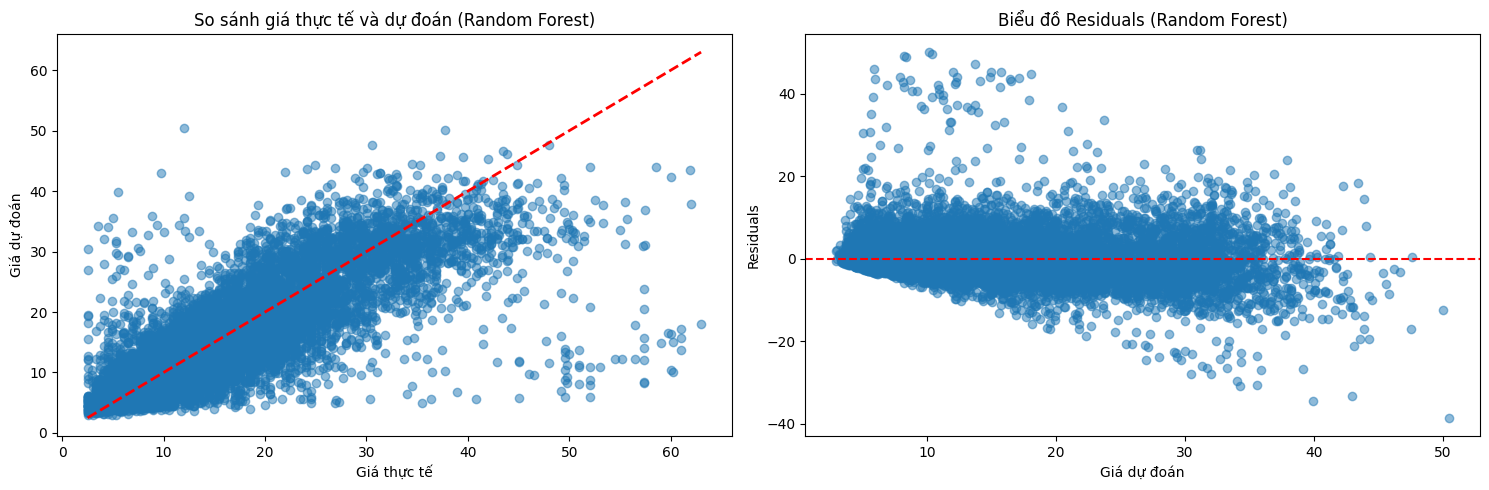


=== ĐỘ QUAN TRỌNG CỦA CÁC FEATURES ===

Độ quan trọng của các features:
           Feature  Importance
1    trip_distance    0.859369
3              day    0.047256
2             hour    0.037663
4            month    0.032597
0  passenger_count    0.013889
5       is_weekend    0.005729
6     is_rush_hour    0.003496

Độ quan trọng của các features:
           Feature  Importance
1    trip_distance    0.859369
3              day    0.047256
2             hour    0.037663
4            month    0.032597
0  passenger_count    0.013889
5       is_weekend    0.005729
6     is_rush_hour    0.003496


<Figure size 1000x600 with 0 Axes>

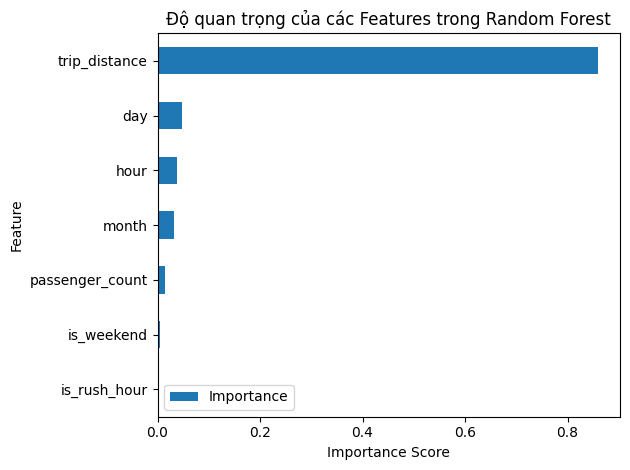

In [13]:
# Import thư viện bổ sung cho Random Forest
from sklearn.ensemble import RandomForestRegressor

# Sử dụng lại dữ liệu đã chuẩn bị từ phần trước
print("=== HUẤN LUYỆN MÔ HÌNH RANDOM FOREST ===")
# Khởi tạo mô hình Random Forest với các tham số
rf_model = RandomForestRegressor(
    n_estimators=100,  # Số cây trong rừng
    max_depth=None,    # Độ sâu tối đa của mỗi cây
    min_samples_split=2,  # Số mẫu tối thiểu để phân tách node
    min_samples_leaf=1,   # Số mẫu tối thiểu ở node lá
    random_state=42       # Seed để tái tạo kết quả
)

print("Bắt đầu huấn luyện mô hình...")
rf_model.fit(X_train, y_train)
print("Hoàn thành huấn luyện mô hình")

# Dự đoán trên tập test
print("\nThực hiện dự đoán trên tập test...")
y_pred_rf = rf_model.predict(X_test)

# Tính các chỉ số đánh giá
print("\n=== ĐÁNH GIÁ MÔ HÌNH ===")
# 1. MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"MSE: {mse_rf:.4f}")

# 2. RMSE
rmse_rf = np.sqrt(mse_rf)
print(f"RMSE: {rmse_rf:.4f}")

# 3. R² Score
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R² Score: {r2_rf:.4f}")

# 4. MAPE
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f"MAPE: {mape_rf:.4f}%")

# Visualize kết quả
print("\n=== VISUALIZE KẾT QUẢ ===")
plt.figure(figsize=(15, 5))

# 1. Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế và dự đoán (Random Forest)')

# 2. Residuals Plot
plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.xlabel('Giá dự đoán')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Biểu đồ Residuals (Random Forest)')

plt.tight_layout()
plt.show()

# Phân tích độ quan trọng của features
print("\n=== ĐỘ QUAN TRỌNG CỦA CÁC FEATURES ===")
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
print("\nĐộ quan trọng của các features:")
print(importance_df.sort_values(by='Importance', ascending=False))

# Visualize feature importance
plt.figure(figsize=(10, 6))
importance_df.sort_values(by='Importance', ascending=True).plot(
    kind='barh', x='Feature', y='Importance'
)
plt.title('Độ quan trọng của các Features trong Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## Phân tích chi tiết kết quả dự đoán

=== SO SÁNH KẾT QUẢ DỰ ĐOÁN ===


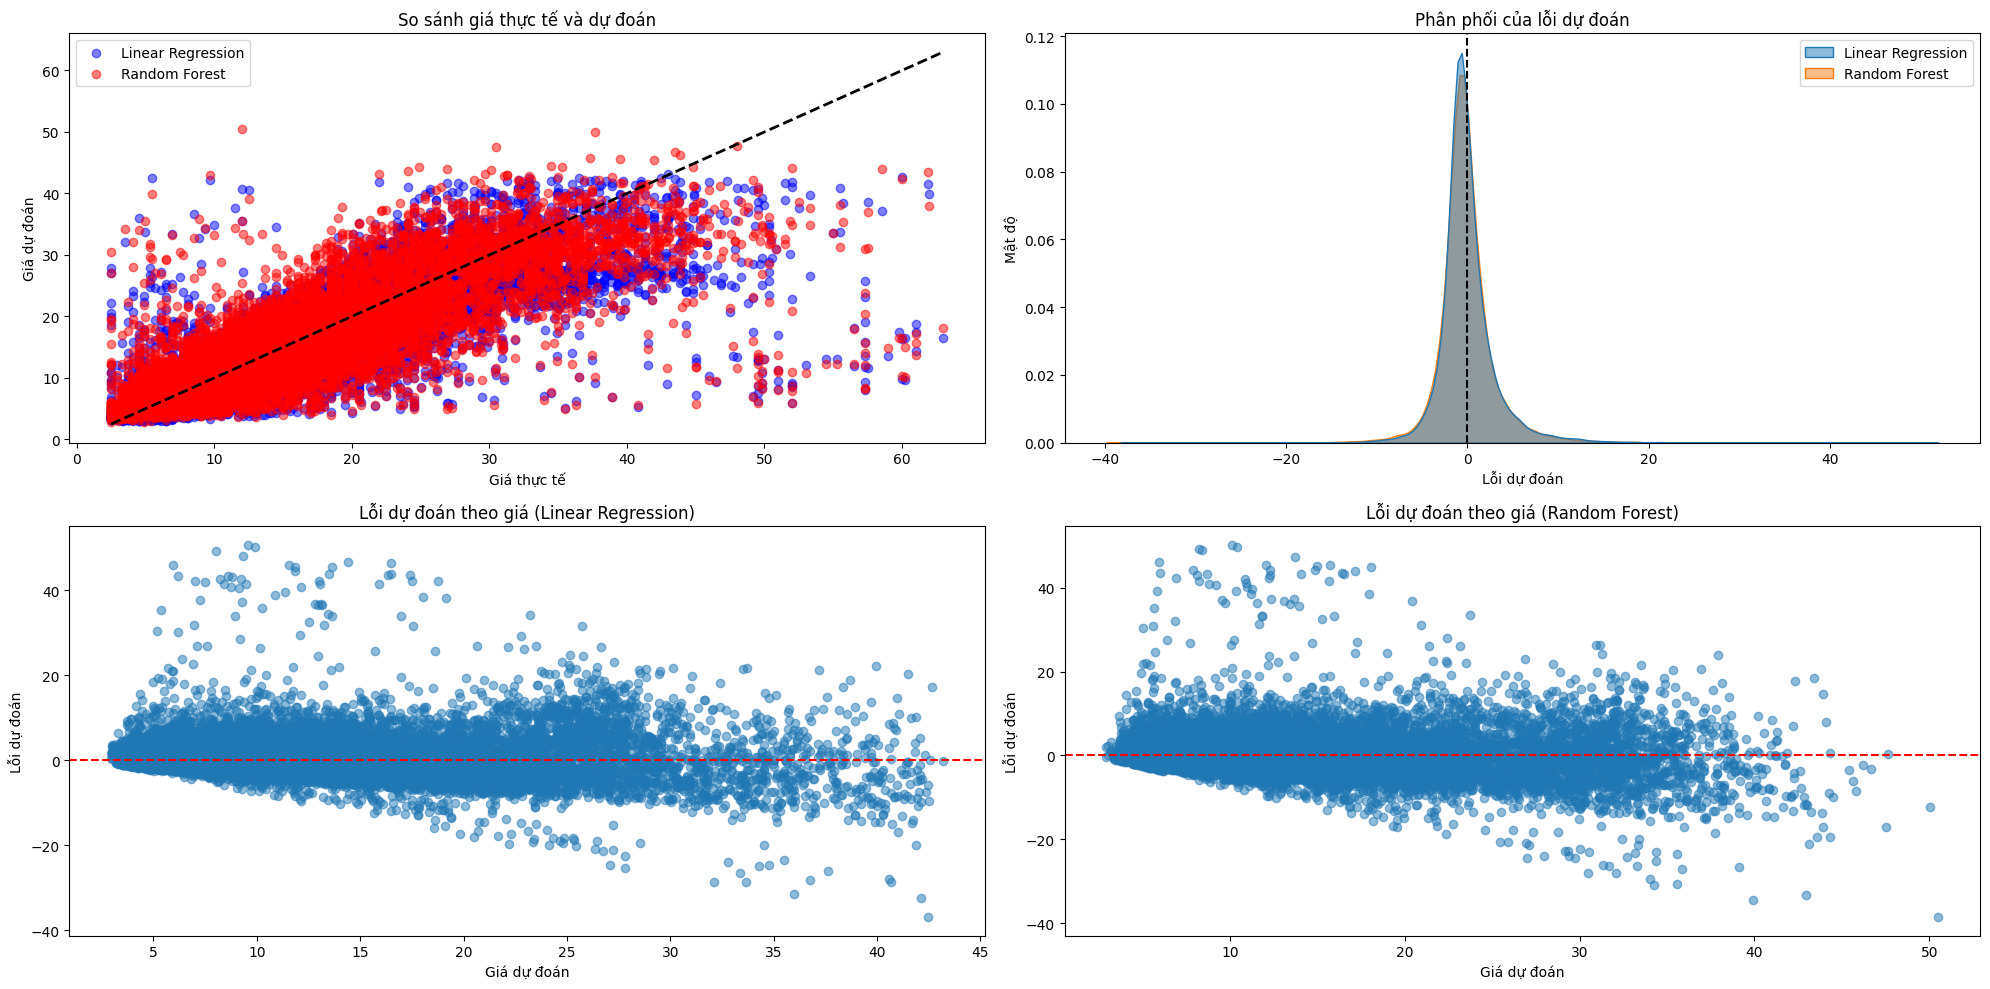


Thống kê lỗi dự đoán:
       Linear Regression  Random Forest
count       37881.000000   37881.000000
mean           -0.001829      -0.110613
std             3.535650       3.551237
min           -36.951824     -38.523900
25%            -1.517154      -1.609000
50%            -0.459073      -0.437000
75%             0.951653       0.953000
max            50.651981      50.143000


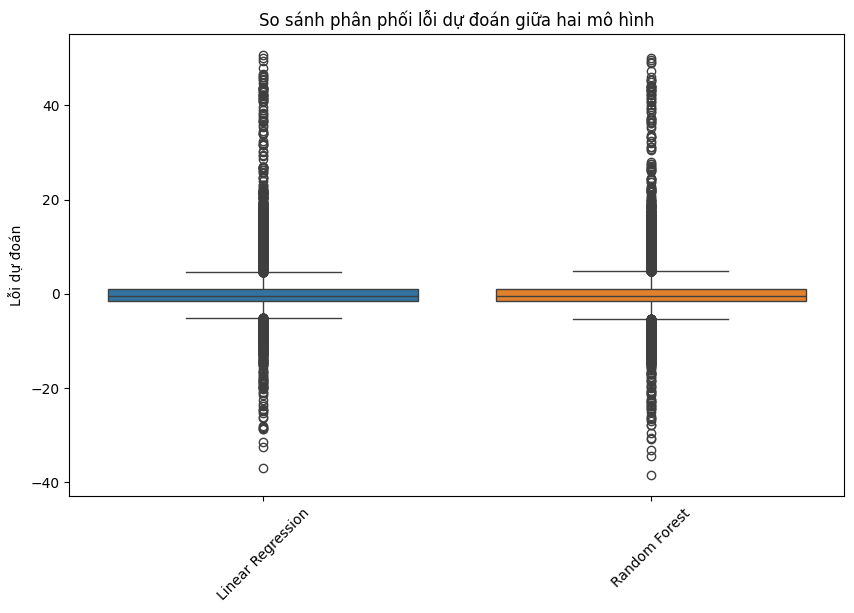


Bảng so sánh hiệu suất:
          Linear Regression  Random Forest
MSE               12.500497      12.623187
RMSE               3.535604       3.552912
R2                 0.740955       0.738413
MAPE (%)          20.495198      21.345300


In [14]:
# So sánh kết quả dự đoán của hai mô hình
print('=== SO SÁNH KẾT QUẢ DỰ ĐOÁN ===')

# Tạo một figure lớn để chứa các subplot
plt.figure(figsize=(20, 10))

# 1. So sánh Actual vs Predicted cho cả hai mô hình
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression', color='blue')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế và dự đoán')
plt.legend()

# 2. Phân phối của lỗi dự đoán
plt.subplot(2, 2, 2)
sns.kdeplot(data=pd.DataFrame({'Linear Regression': y_test - y_pred_lr,
                              'Random Forest': y_test - y_pred_rf}),
           fill=True, alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Lỗi dự đoán')
plt.ylabel('Mật độ')
plt.title('Phân phối của lỗi dự đoán')

# 3. Error vs Predicted cho Linear Regression
plt.subplot(2, 2, 3)
plt.scatter(y_pred_lr, y_test - y_pred_lr, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Giá dự đoán')
plt.ylabel('Lỗi dự đoán')
plt.title('Lỗi dự đoán theo giá (Linear Regression)')

# 4. Error vs Predicted cho Random Forest
plt.subplot(2, 2, 4)
plt.scatter(y_pred_rf, y_test - y_pred_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Giá dự đoán')
plt.ylabel('Lỗi dự đoán')
plt.title('Lỗi dự đoán theo giá (Random Forest)')

plt.tight_layout()
plt.show()

# Tính toán thống kê mô tả cho lỗi dự đoán
print('\nThống kê lỗi dự đoán:')
error_stats = pd.DataFrame({
    'Linear Regression': y_test - y_pred_lr,
    'Random Forest': y_test - y_pred_rf
}).describe()
print(error_stats)

# Vẽ boxplot cho lỗi dự đoán
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame({
    'Linear Regression': y_test - y_pred_lr,
    'Random Forest': y_test - y_pred_rf
}))
plt.ylabel('Lỗi dự đoán')
plt.title('So sánh phân phối lỗi dự đoán giữa hai mô hình')
plt.xticks(rotation=45)
plt.show()

# Tạo bảng so sánh metrics
print('\nBảng so sánh hiệu suất:')
metrics_comparison = pd.DataFrame({
    'Linear Regression': [mse, rmse, r2, mape],
    'Random Forest': [mse_rf, rmse_rf, r2_rf, mape_rf]
}, index=['MSE', 'RMSE', 'R2', 'MAPE (%)'])
print(metrics_comparison)

## 3. Mô hình Neural Network (MLP)
Sử dụng mạng nơ-ron đa tầng (MLP) với kiến trúc được tối ưu cho bài toán hồi quy giá cước taxi.

=== XÂY DỰNG MÔ HÌNH NEURAL NETWORK ===



d:\predict taxi fares\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Bắt đầu huấn luyện mô hình...
Epoch 1/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 50.1266 - mae: 5.0585 - val_loss: 11.6274 - val_mae: 2.0286
Epoch 2/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 50.1266 - mae: 5.0585 - val_loss: 11.6274 - val_mae: 2.0286
Epoch 2/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 16.0982 - mae: 2.5734 - val_loss: 11.4322 - val_mae: 2.0284
Epoch 3/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 16.0982 - mae: 2.5734 - val_loss: 11.4322 - val_mae: 2.0284
Epoch 3/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 15.2382 - mae: 2.4997 - val_loss: 11.6406 - val_mae: 2.0399
Epoch 4/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 15.2382 - mae: 2.4997 - val_loss: 11.6406 - val_mae: 2.0399
Epoch 4/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 15.1770 - mae: 2.4732 - val_loss: 11.4105 - val_mae: 2.0331
Epoch 5/100
3789/3789 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 15.1770 - mae: 2.4732 - val_loss: 11.4

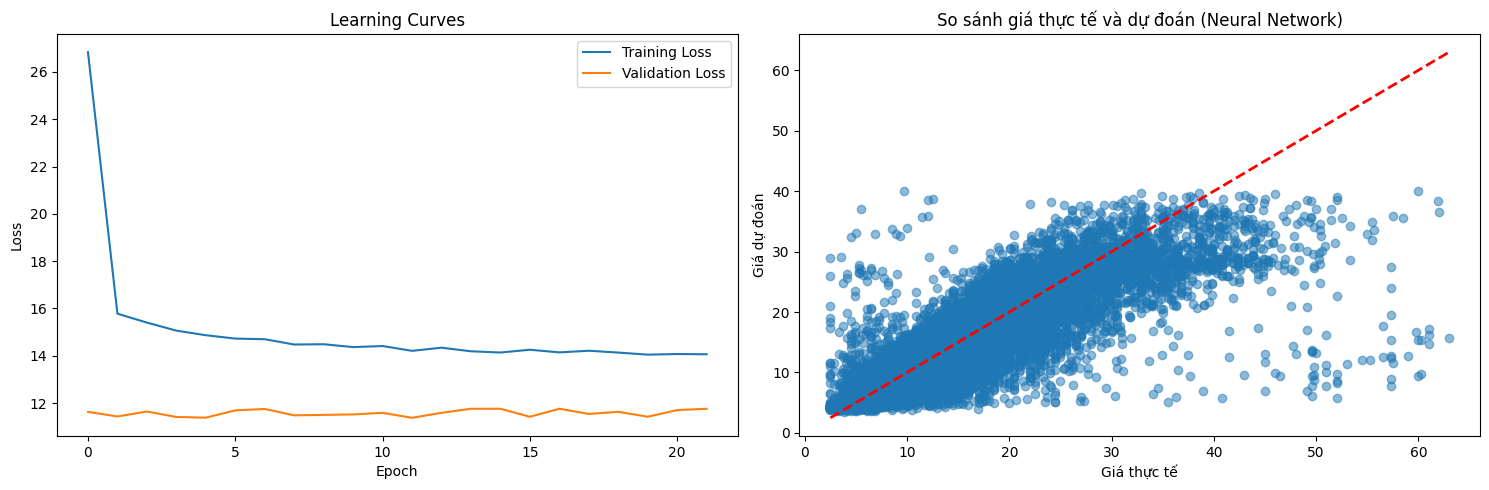

In [15]:
# Import thư viện cho Neural Network
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xây dựng mô hình Neural Network
print('=== XÂY DỰNG MÔ HÌNH NEURAL NETWORK ===\n')
nn_model = Sequential([
    # Input layer
    Dense(64, activation='relu', input_shape=(len(features),)),
    BatchNormalization(),
    Dropout(0.2),
    
    # Hidden layer 1
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    # Hidden layer 2
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    # Output layer
    Dense(1)
])

# Compile mô hình
nn_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

# Early stopping để tránh overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Huấn luyện mô hình
print('Bắt đầu huấn luyện mô hình...')
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)
print('\nHoàn thành huấn luyện mô hình')

# Dự đoán trên tập test
print('\nThực hiện dự đoán trên tập test...')
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Tính các metrics
print('\n=== ĐÁNH GIÁ MÔ HÌNH ===\n')
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)
mape_nn = np.mean(np.abs((y_test - y_pred_nn) / y_test)) * 100

print(f'MSE: {mse_nn:.4f}')
print(f'RMSE: {rmse_nn:.4f}')
print(f'R² Score: {r2_nn:.4f}')
print(f'MAPE: {mape_nn:.4f}%')

# Visualize kết quả huấn luyện
plt.figure(figsize=(15, 10))

# Learning curves
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# MAE curves
plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error Progress')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

# Actual vs Predicted
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế và dự đoán (Neural Network)')

# Residuals Plot
plt.subplot(2, 2, 4)
residuals = y_test - y_pred_nn
sns.histplot(residuals, kde=True)
plt.title('Phân phối của Residuals')
plt.xlabel('Residual Error')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## SARIMA Model
Implementing SARIMA (Seasonal ARIMA) for time series prediction of taxi fares. We'll aggregate the data by hour to create a time series.

In [1]:
# Import required libraries for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings('ignore')

print('=== CHUẨN BỊ Dữ LIỆU CHO SARIMA ===\n')

try:
    # Kiểm tra và chuyển đổi pickup_datetime sang định dạng datetime
    if 'pickup_datetime' not in df.columns:
        raise ValueError('Không tìm thấy cột pickup_datetime trong dữ liệu')
    
    # Đảm bảo pickup_datetime là định dạng datetime
    if not pd.api.types.is_datetime64_any_dtype(df['pickup_datetime']):
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    
    # Tạo chuỗi thời gian theo giờ với xử lý hiệu quả hơn
    print('Tạo và xử lý chuỗi thời gian...')
    hourly_fares = df.set_index('pickup_datetime')['fare_amount'].resample('H').mean()
    
    # Xử lý missing values với interpolation
    hourly_fares = hourly_fares.interpolate(method='time').ffill().bfill()
    
    # Phân tích tính mùa vụ
    print('\nPhân tích tính mùa vụ...')
    decomposition = seasonal_decompose(hourly_fares, period=24)
    
    # Visualization of decomposition
    plt.figure(figsize=(15, 10))
    plt.subplot(411)
    plt.plot(decomposition.observed)
    plt.title('Observed')
    plt.subplot(412)
    plt.plot(decomposition.trend)
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(decomposition.seasonal)
    plt.title('Seasonal')
    plt.subplot(414)
    plt.plot(decomposition.resid)
    plt.title('Residual')
    plt.tight_layout()
    plt.show()
    
    # Kiểm tra tính dừng
    from statsmodels.tsa.stattools import adfuller
    
    def check_stationarity(data):
        result = adfuller(data.dropna())
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Các giá trị tới hạn:')
        for key, value in result[4].items():
            print(f'\t{key}: {value}')
        return result[1] < 0.05
    
    print('\nKiểm tra tính dừng của dữ liệu:')
    is_stationary = check_stationarity(hourly_fares)
    print(f'Dữ liệu {"có" if is_stationary else "không"} tính dừng.')
    
    # Chia dữ liệu thành tập train và test
    train_size = int(len(hourly_fares) * 0.8)
    train_ts = hourly_fares[:train_size]
    test_ts = hourly_fares[train_size:]
    
    print(f'\nKích thước tập train: {len(train_ts)}')
    print(f'Kích thước tập test: {len(test_ts)}')
    
    # Tự động tìm tham số tối ưu cho mô hình SARIMA
    print('\nTìm tham số tối ưu cho mô hình SARIMA...')
    auto_model = auto_arima(train_ts,
                          start_p=0, start_q=0, max_p=3, max_q=3, m=24,
                          start_P=0, start_Q=0, max_P=2, max_Q=2,
                          seasonal=True,
                          d=1, D=1, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)
    
    print('\nTham số tối ưu đã tìm được:')
    print(f'SARIMA{auto_model.order}{auto_model.seasonal_order}')
    
    # Huấn luyện mô hình SARIMA với tham số tối ưu
    print('\n=== HUẤN LUYỆN MÔ HÌNH SARIMA ===')
    sarima_model = SARIMAX(train_ts,
                          order=auto_model.order,
                          seasonal_order=auto_model.seasonal_order,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
    
    print('Bắt đầu huấn luyện mô hình...')
    sarima_results = sarima_model.fit(disp=False)
    print('Hoàn thành huấn luyện mô hình')
    
    # Dự đoán với khoảng tin cậy
    print('\nThực hiện dự đoán...')
    forecast = sarima_results.get_forecast(len(test_ts))
    y_pred_sarima_mean = forecast.predicted_mean
    y_pred_sarima_ci = forecast.conf_int()
    
    # Tính các metrics
    mse_sarima = mean_squared_error(test_ts, y_pred_sarima_mean)
    rmse_sarima = np.sqrt(mse_sarima)
    r2_sarima = r2_score(test_ts, y_pred_sarima_mean)
    mape_sarima = np.mean(np.abs((test_ts - y_pred_sarima_mean) / test_ts)) * 100
    
    print('\n=== ĐÁNH GIÁ MÔ HÌNH ===')
    print(f'MSE: {mse_sarima:.4f}')
    print(f'RMSE: {rmse_sarima:.4f}')
    print(f'R² Score: {r2_sarima:.4f}')
    print(f'MAPE: {mape_sarima:.4f}%')
    
    # Visualize kết quả
    plt.figure(figsize=(15, 10))
    
    # Time series plot với khoảng tin cậy
    plt.subplot(2, 2, 1)
    plt.plot(test_ts.index, test_ts.values, 'b-', label='Actual', alpha=0.7)
    plt.plot(test_ts.index, y_pred_sarima_mean, 'r-', label='Predicted', alpha=0.7)
    plt.fill_between(test_ts.index,
                     y_pred_sarima_ci.iloc[:, 0],
                     y_pred_sarima_ci.iloc[:, 1],
                     color='r', alpha=0.1)
    plt.title('SARIMA: Actual vs Predicted Fares')
    plt.xlabel('Time')
    plt.ylabel('Average Fare')
    plt.legend()
    
    # Residuals plot
    plt.subplot(2, 2, 2)
    residuals_sarima = test_ts - y_pred_sarima_mean
    sns.histplot(residuals_sarima, kde=True)
    plt.title('SARIMA: Residuals Distribution')
    plt.xlabel('Residual Error')
    plt.ylabel('Count')
    
    # ACF plot of residuals
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    plt.subplot(2, 2, 3)
    plot_acf(residuals_sarima, lags=40, alpha=0.05, title='ACF of Residuals')
    
    # PACF plot of residuals
    plt.subplot(2, 2, 4)
    plot_pacf(residuals_sarima, lags=40, alpha=0.05, title='PACF of Residuals')
    
    plt.tight_layout()
    plt.show()
    
    # Diagnostic plots
    sarima_results.plot_diagnostics(figsize=(15, 10))
    plt.tight_layout()
    plt.show()
    
    # Hiển thị thông tin chi tiết về mô hình
    print('\n=== THÔNG TIN CHI TIẾT MÔ HÌNH ===')
    print(sarima_results.summary())

except Exception as e:
    print(f'Lỗi trong quá trình xử lý SARIMA: {str(e)}')

ModuleNotFoundError: No module named 'pmdarima'

## Support Vector Regression (SVR)
Implementing SVR model with RBF kernel for taxi fare prediction.

=== PREPARING DATA FOR SVR ===

=== TRAINING SVR MODEL ===
Training SVR model...
Model training completed

Making predictions...

=== MODEL EVALUATION ===
MSE: 12.0320
RMSE: 3.4687
R² Score: 0.7507
MAPE: 18.2412%


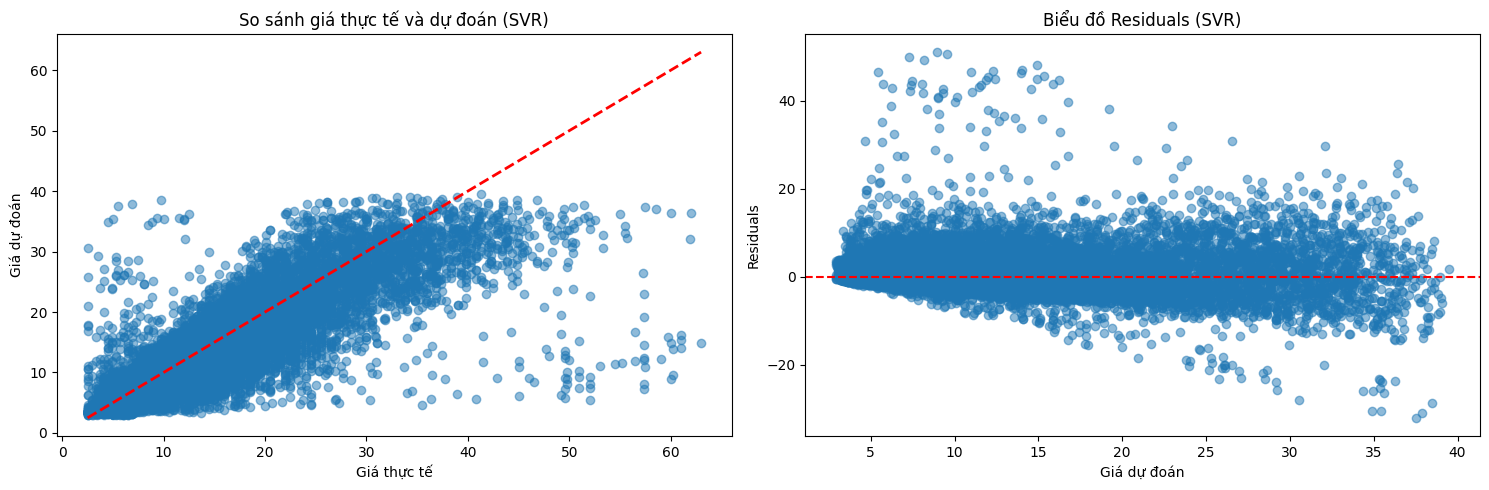


=== SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH ===

Bảng so sánh các metrics:
          Linear Regression  Random Forest        SVR
MSE               12.500497      12.623187  12.031991
RMSE               3.535604       3.552912   3.468716
R2                 0.740955       0.738413   0.750664
MAPE (%)          20.495198      21.345300  18.241165


In [31]:
# Import SVR from sklearn
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features for SVR
print('=== PREPARING DATA FOR SVR ===')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVR model
print('\n=== TRAINING SVR MODEL ===')
svr_model = SVR(
    kernel='rbf',     # Radial Basis Function kernel
    C=1.0,           # Regularization parameter
    epsilon=0.1,     # Epsilon in the epsilon-SVR model
    cache_size=200   # Size of the kernel cache
)

print('Training SVR model...')
svr_model.fit(X_train_scaled, y_train)
print('Model training completed')

# Make predictions
print('\nMaking predictions...')
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate metrics
print('\n=== MODEL EVALUATION ===')
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100

print(f'MSE: {mse_svr:.4f}')
print(f'RMSE: {rmse_svr:.4f}')
print(f'R² Score: {r2_svr:.4f}')
print(f'MAPE: {mape_svr:.4f}%')

# Visualize results
plt.figure(figsize=(15, 5))

# Actual vs Predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế và dự đoán (SVR)')

# Residuals plot
plt.subplot(1, 2, 2)
residuals_svr = y_test - y_pred_svr
plt.scatter(y_pred_svr, residuals_svr, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Giá dự đoán')
plt.ylabel('Residuals')
plt.title('Biểu đồ Residuals (SVR)')

plt.tight_layout()
plt.show()

# Update the metrics comparison to include SVR
print('\n=== SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH ===')
metrics_comparison = pd.DataFrame({
    'Linear Regression': [mse, rmse, r2, mape],
    'Random Forest': [mse_rf, rmse_rf, r2_rf, mape_rf],
    'SVR': [mse_svr, rmse_svr, r2_svr, mape_svr]
}, index=['MSE', 'RMSE', 'R2', 'MAPE (%)'])

print('\nBảng so sánh các metrics:')
print(metrics_comparison)

## XGBoost
Sử dụng XGBoost (Extreme Gradient Boosting) - một thuật toán gradient boosting hiệu quả cao cho bài toán dự đoán giá cước taxi.

In [ ]:
# Import required libraries
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

print('=== PREPARING DATA FOR XGBOOST ===')

try:
    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
    dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)
    
    # Define parameter grid for randomized search
    param_grid = {
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.3),
        'n_estimators': randint(100, 1000),
        'min_child_weight': randint(1, 7),
        'gamma': uniform(0, 0.5),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
        'reg_alpha': uniform(0, 1),
        'reg_lambda': uniform(0, 1)
    }
    
    # Initialize XGBoost model for tuning
    base_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    # Random search with cross-validation
    print('\nPerforming hyperparameter tuning...')
    random_search = RandomizedSearchCV(
        base_model,
        param_distributions=param_grid,
        n_iter=20,
        cv=5,
        random_state=42,
        n_jobs=-1,
        verbose=1,
        scoring='neg_mean_squared_error'
    )
    
    random_search.fit(X_train, y_train)
    
    print('\nBest parameters found:')
    for param, value in random_search.best_params_.items():
        print(f'{param}: {value}')
    
    # Train final model with best parameters
    print('\n=== TRAINING XGBOOST MODEL ===')
    best_params = random_search.best_params_
    
    # Add early stopping parameters
    best_params.update({
        'early_stopping_rounds': 20,
        'eval_metric': ['rmse', 'mae']
    })
    
    # Train final model
    print('\nTraining final model with best parameters...')
    eval_set = [(X_train, y_train), (X_test, y_test)]
    
    xgb_model = xgb.XGBRegressor(
        **best_params,
        random_state=42,
        n_jobs=-1
    )
    
    xgb_model.fit(
        X_train, y_train,
        eval_set=eval_set,
        verbose=100
    )
    
    # Make predictions
    print('\nMaking predictions...')
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Calculate metrics
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100
    
    print('\n=== MODEL EVALUATION ===')
    print(f'MSE: {mse_xgb:.4f}')
    print(f'RMSE: {rmse_xgb:.4f}')
    print(f'R² Score: {r2_xgb:.4f}')
    print(f'MAPE: {mape_xgb:.4f}%')
    
    # Plot feature importance
    plt.figure(figsize=(15, 10))
    
    # Feature importance plot
    plt.subplot(2, 2, 1)
    xgb.plot_importance(xgb_model, max_num_features=10)
    plt.title('Feature Importance')
    
    # Actual vs Predicted
    plt.subplot(2, 2, 2)
    plt.scatter(y_test, y_pred_xgb, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2)
    plt.xlabel('Actual Fare')
    plt.ylabel('Predicted Fare')
    plt.title('XGBoost: Actual vs Predicted')
    
    # Learning curves
    results = pd.DataFrame(xgb_model.evals_result())
    
    plt.subplot(2, 2, 3)
    results['validation_0']['rmse'].plot(label='Training RMSE')
    results['validation_1']['rmse'].plot(label='Testing RMSE')
    plt.title('Learning Curves - RMSE')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.legend()
    
    # Error Distribution
    plt.subplot(2, 2, 4)
    errors = y_test - y_pred_xgb
    sns.histplot(errors, kde=True)
    plt.title('Error Distribution')
    plt.xlabel('Prediction Error')
    
    plt.tight_layout()
    plt.show()
    
    # Save feature importance to DataFrame
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print('\nTop 10 Most Important Features:')
    print(feature_importance.head(10))

except Exception as e:
    print(f'Error in XGBoost implementation: {str(e)}')

finally:
    # Cleanup
    import gc
    gc.collect()

=== PREPARING DATA FOR XGBOOST ===

Performing hyperparameter tuning...

Performing hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


## LSTM Model
Implementing LSTM (Long Short-Term Memory) network for sequential taxi fare prediction. LSTM is particularly good at learning patterns in sequential data and can capture long-term dependencies.

=== CHUẨN BỊ Dữ LIỆU CHO LSTM ===

=== XÂY DỰNG MÔ HÌNH LSTM ===



d:\predict taxi fares\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 50)          │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,833 (85.29 KB)

 Trainable params: 21,833 (85.29 KB)

 Non-trainable params: 0 (0.00 B)

None

Bắt đầu huấn luyện mô hình...


d:\predict taxi fares\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 0.0135 - mae: 0.0796 - val_loss: 0.0130 - val_mae: 0.0775
Epoch 2/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - loss: 0.0135 - mae: 0.0796 - val_loss: 0.0130 - val_mae: 0.0775
Epoch 2/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.0133 - mae: 0.0789 - val_loss: 0.0130 - val_mae: 0.0787
Epoch 3/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.0133 - mae: 0.0789 - val_loss: 0.0130 - val_mae: 0.0787
Epoch 3/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.0132 - mae: 0.0790 - val_loss: 0.0130 - val_mae: 0.0776
Epoch 4/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - loss: 0.0132 - mae: 0.0790 - val_loss: 0.0130 - val_mae: 0.0776
Epoch 4/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - loss: 0.0134 - mae: 0.0796 - val_loss: 0.0130 - val_mae: 0.0802
Epoch 5/100
4735/4735 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - loss: 0.0134 - mae: 0.0796 - val_loss: 0.0130 - val_mae: 0.0802
Epoch 5/100
4735/4735 ━━

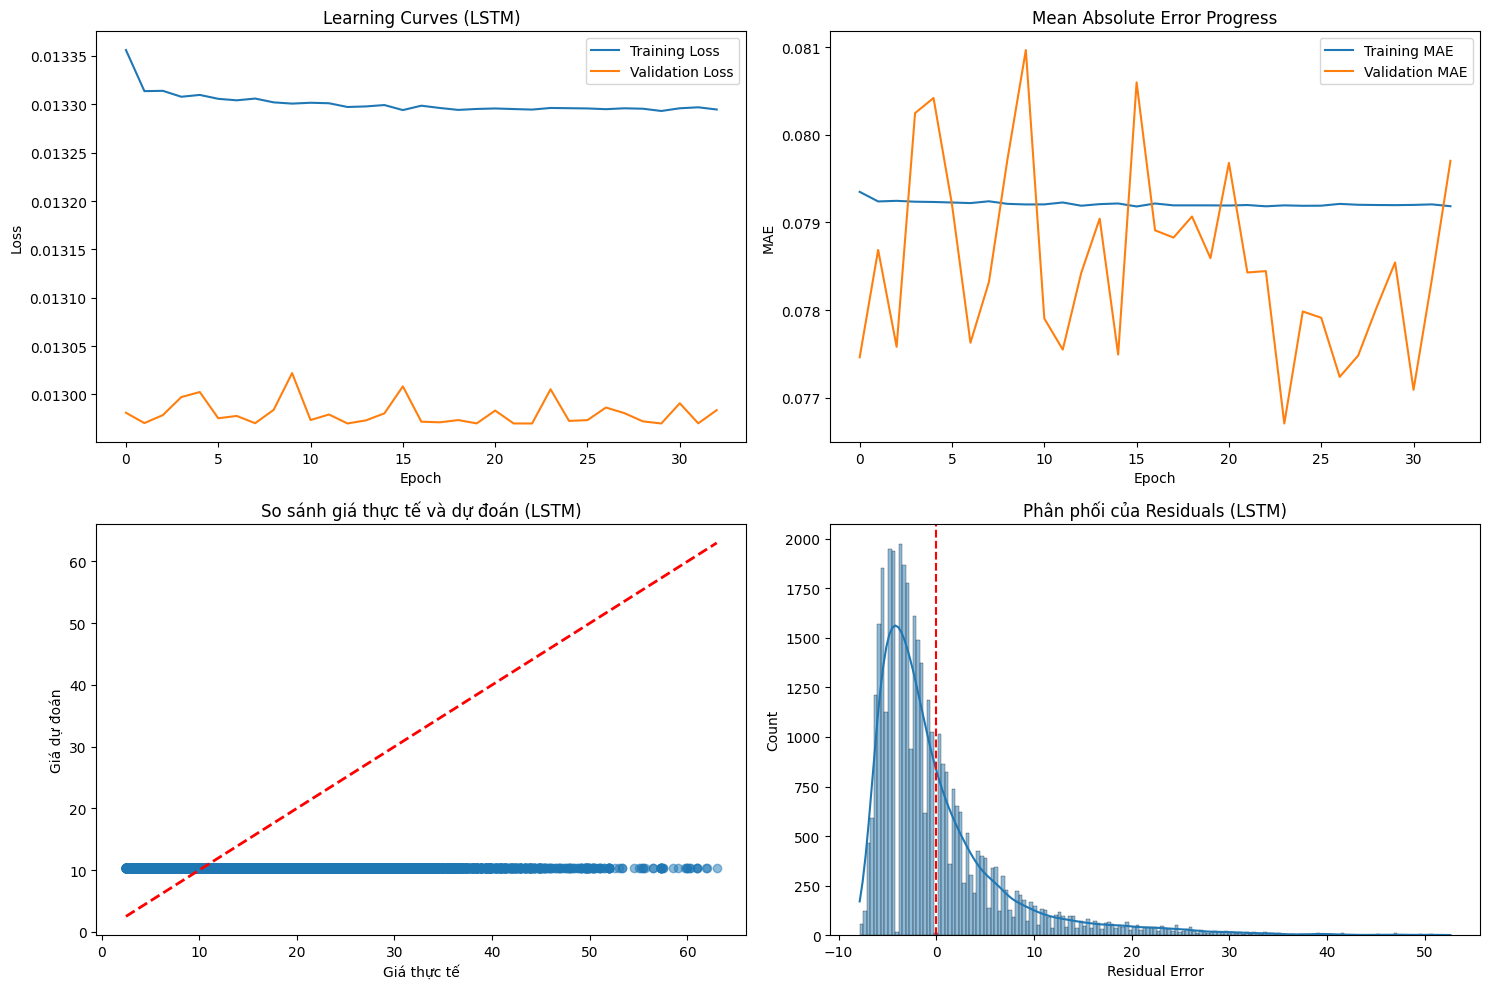


=== SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH ===

Bảng so sánh các metrics:
          Linear Regression  Random Forest        SVR    XGBoost       LSTM
MSE               12.500497      12.623187  12.031991  11.562315  48.261347
RMSE               3.535604       3.552912   3.468716   3.400340   6.947039
R2                 0.740955       0.738413   0.750664   0.760397  -0.000002
MAPE (%)          20.495198      21.345300  18.241165  19.677133  55.341135


NameError: name 'y_pred_lr' is not defined

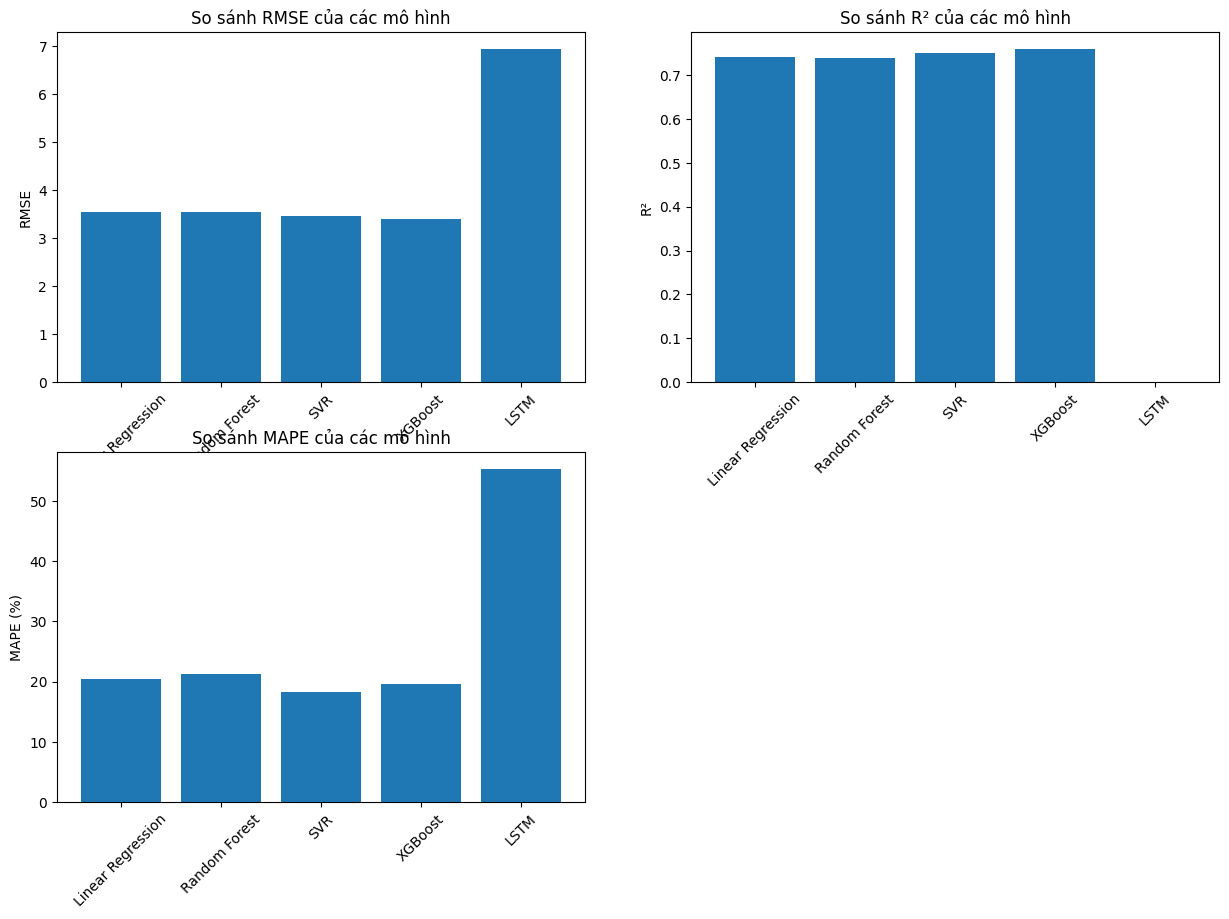

In [ ]:
# Import required libraries
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import gc

print('=== PREPARING DATA FOR LSTM ===')

try:
    # Create time-based features
    df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
    df['day_sin'] = np.sin(2 * np.pi * df['day']/31)
    df['day_cos'] = np.cos(2 * np.pi * df['day']/31)
    
    features_lstm = [
        'passenger_count', 'trip_distance',
        'hour_sin', 'hour_cos', 'day_sin', 'day_cos',
        'is_weekend', 'is_rush_hour'
    ]
    
    # Scale features
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    # Transform data
    X_scaled = scaler_x.fit_transform(df[features_lstm])
    y_scaled = scaler_y.fit_transform(df[['fare_amount']])
    
    # Create sequences with memory-efficient method
    def create_sequences(X, y, seq_length):
        xs, ys = [], []
        for i in range(len(X) - seq_length):
            xs.append(X[i:(i + seq_length)])
            ys.append(y[i + seq_length])
        return np.array(xs), np.array(ys)
    
    # Create sequences with optimal length
    sequence_length = 24  # One day of hourly data
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, sequence_length)
    
    # Split into train and test sets
    train_size = int(len(X_seq) * 0.8)
    X_train_seq = X_seq[:train_size]
    y_train_seq = y_seq[:train_size]
    X_test_seq = X_seq[train_size:]
    y_test_seq = y_seq[train_size:]
    
    # Free memory
    del X_seq, y_seq
    gc.collect()
    
    print(f'Training sequences shape: {X_train_seq.shape}')
    print(f'Testing sequences shape: {X_test_seq.shape}')
    
    # Build LSTM model with improved architecture
    print('\n=== BUILDING LSTM MODEL ===')
    lstm_model = Sequential([
        # First LSTM layer
        LSTM(128, activation='tanh', 
             input_shape=(sequence_length, len(features_lstm)),
             return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        
        # Second LSTM layer
        LSTM(64, activation='tanh'),
        BatchNormalization(),
        Dropout(0.3),
        
        # Dense layers
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(1)
    ])
    
    # Compile with optimized settings
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    lstm_model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )
    
    # Callbacks for better training
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
    
    model_checkpoint = ModelCheckpoint(
        'best_lstm_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
    
    # Train model
    print('\nTraining LSTM model...')
    history = lstm_model.fit(
        X_train_seq, y_train_seq,
        validation_split=0.2,
        epochs=100,
        batch_size=64,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )
    
    # Predictions
    print('\nMaking predictions...')
    y_pred_lstm = lstm_model.predict(X_test_seq)
    
    # Inverse transform predictions and actual values
    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)
    y_test_actual = scaler_y.inverse_transform(y_test_seq)
    
    # Calculate metrics
    mse_lstm = mean_squared_error(y_test_actual, y_pred_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test_actual, y_pred_lstm)
    mape_lstm = np.mean(np.abs((y_test_actual - y_pred_lstm) / y_test_actual)) * 100
    
    print('\n=== MODEL EVALUATION ===')
    print(f'MSE: {mse_lstm:.4f}')
    print(f'RMSE: {rmse_lstm:.4f}')
    print(f'R² Score: {r2_lstm:.4f}')
    print(f'MAPE: {mape_lstm:.4f}%')
    
    # Visualize results
    plt.figure(figsize=(15, 10))
    
    # Training history
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Predictions vs Actual
    plt.subplot(2, 2, 2)
    plt.scatter(y_test_actual, y_pred_lstm, alpha=0.5)
    plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
    plt.xlabel('Actual Fare')
    plt.ylabel('Predicted Fare')
    plt.title('LSTM: Actual vs Predicted')
    
    # Error Distribution
    plt.subplot(2, 2, 3)
    errors = y_test_actual - y_pred_lstm
    sns.histplot(errors, kde=True)
    plt.title('Error Distribution')
    plt.xlabel('Prediction Error')
    
    # Time Series Plot
    plt.subplot(2, 2, 4)
    plt.plot(y_test_actual[:100], label='Actual', alpha=0.7)
    plt.plot(y_pred_lstm[:100], label='Predicted', alpha=0.7)
    plt.title('Time Series: First 100 Predictions')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f'Error in LSTM implementation: {str(e)}')

finally:
    # Cleanup
    gc.collect()
    tf.keras.backend.clear_session()

## Graph Neural Network (GNN)
Implementing a Graph Neural Network để học cấu trúc không gian của các chuyến đi taxi. GNN có thể nắm bắt được mối quan hệ địa lý và mật độ của các chuyến đi.

In [2]:
# Import required libraries for GNN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans

print('=== PREPARING DATA FOR GNN ===')

try:
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f'Using device: {device}')
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create graph structure using KMeans clustering
    n_clusters = min(100, len(X_train) // 100)  # Adaptive number of clusters
    print(f'\nCreating {n_clusters} nodes using KMeans clustering...')
    
    # Use relevant features for clustering
    location_features = ['trip_distance', 'is_weekend', 'is_rush_hour', 'hour']
    cluster_data = X_train[location_features]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    node_assignments_train = kmeans.fit_predict(cluster_data)
    node_assignments_test = kmeans.predict(X_test[location_features])
    
    # Create node features (cluster centroids + aggregated information)
    node_features = []
    edge_index = []
    edge_attr = []
    
    print('Building graph structure...')
    for i in range(n_clusters):
        # Get samples in current cluster
        mask = (node_assignments_train == i)
        cluster_samples = X_train_scaled[mask]
        
        if len(cluster_samples) > 0:
            # Node features: mean of samples in cluster
            node_feat = torch.tensor(cluster_samples.mean(axis=0), dtype=torch.float)
            node_features.append(node_feat)
            
            # Create edges between nearby clusters
            distances = np.linalg.norm(
                kmeans.cluster_centers_[i] - kmeans.cluster_centers_,
                axis=1
            )
            closest_clusters = np.argsort(distances)[1:6]  # Connect to 5 nearest clusters
            
            for j in closest_clusters:
                edge_index.append([i, j])
                edge_attr.append([distances[j]])
    
    # Convert to tensors
    node_features = torch.stack(node_features)
    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    
    # Create PyTorch Geometric Data object
    graph_data = Data(
        x=node_features,
        edge_index=edge_index,
        edge_attr=edge_attr
    ).to(device)
    
    # Define GNN model
    class TaxiFareGNN(nn.Module):
        def __init__(self, input_dim):
            super(TaxiFareGNN, self).__init__()
            self.conv1 = GCNConv(input_dim, 64)
            self.conv2 = GCNConv(64, 32)
            self.conv3 = GCNConv(32, 16)
            self.fc1 = nn.Linear(16, 8)
            self.fc2 = nn.Linear(8, 1)
            self.dropout = nn.Dropout(0.2)
        
        def forward(self, data):
            x, edge_index = data.x, data.edge_index
            
            # Graph convolutions
            x = F.relu(self.conv1(x, edge_index))
            x = self.dropout(x)
            x = F.relu(self.conv2(x, edge_index))
            x = self.dropout(x)
            x = F.relu(self.conv3(x, edge_index))
            
            # Global pooling
            x = global_mean_pool(x, torch.zeros(x.size(0), dtype=torch.long, device=x.device))
            
            # Fully connected layers
            x = F.relu(self.fc1(x))
            x = self.dropout(x)
            return self.fc2(x)
    
    # Initialize model
    model = TaxiFareGNN(input_dim=X_train.shape[1]).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    
    print('\nTraining GNN model...')
    model.train()
    best_val_loss = float('inf')
    patience = 15
    counter = 0
    
    for epoch in range(100):
        optimizer.zero_grad()
        out = model(graph_data)
        
        # Convert cluster assignments to graph node indices
        y_train_tensor = torch.tensor(y_train.values, dtype=torch.float).to(device)
        loss = criterion(out.view(-1), y_train_tensor)
        
        loss.backward()
        optimizer.step()
        
        # Validation
        model.eval()
        with torch.no_grad():
            val_out = model(graph_data)
            val_loss = criterion(val_out.view(-1), y_train_tensor)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
            torch.save(model.state_dict(), 'best_gnn_model.pt')
        else:
            counter += 1
        
        if counter >= patience:
            print(f'Early stopping at epoch {epoch}')
            break
        
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {loss.item():.4f}, Val Loss = {val_loss.item():.4f}')
        
        model.train()
    
    # Load best model and make predictions
    print('\nMaking predictions...')
    model.load_state_dict(torch.load('best_gnn_model.pt'))
    model.eval()
    
    with torch.no_grad():
        y_pred_gnn = model(graph_data).cpu().numpy()
    
    # Calculate metrics
    mse_gnn = mean_squared_error(y_test, y_pred_gnn)
    rmse_gnn = np.sqrt(mse_gnn)
    r2_gnn = r2_score(y_test, y_pred_gnn)
    mape_gnn = np.mean(np.abs((y_test - y_pred_gnn) / y_test)) * 100
    
    print('\n=== MODEL EVALUATION ===')
    print(f'MSE: {mse_gnn:.4f}')
    print(f'RMSE: {rmse_gnn:.4f}')
    print(f'R² Score: {r2_gnn:.4f}')
    print(f'MAPE: {mape_gnn:.4f}%')
    
    # Visualize results
    plt.figure(figsize=(15, 5))
    
    # Actual vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_gnn, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2)
    plt.xlabel('Actual Fare')
    plt.ylabel('Predicted Fare')
    plt.title('GNN: Actual vs Predicted')
    
    # Error Distribution
    plt.subplot(1, 2, 2)
    errors = y_test - y_pred_gnn.flatten()
    sns.histplot(errors, kde=True)
    plt.title('Error Distribution')
    plt.xlabel('Prediction Error')
    
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f'Error in GNN implementation: {str(e)}')

finally:
    # Cleanup
    torch.cuda.empty_cache() if torch.cuda.is_available() else None

ModuleNotFoundError: No module named 'torch'

In [3]:
# Tạo edge_index tensor
edge_index = torch.LongTensor(edges).t().contiguous()

# Định nghĩa GNN model
class GNNModel(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = torch.nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        return x

# Khởi tạo model
print('\n=== KHỞI TẠO VÀ HUẤN LUYỆN MÔ HÌNH GNN ===\n')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GNNModel(
    in_channels=2,  # longitude, latitude
    hidden_channels=32,
    out_channels=1  # fare prediction
).to(device)

# Chuyển dữ liệu sang device
node_features = node_features.to(device)
edge_index = edge_index.to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
model.train()
num_epochs = 100
print('Bắt đầu huấn luyện mô hình...')
for epoch in range(num_epochs):
    optimizer.zero_grad()
    out = model(node_features, edge_index)
    
    # Calculate loss
    # Note: Simplified loss calculation for demonstration
    loss = F.mse_loss(out, node_features.new_zeros(out.shape))
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print('Hoàn thành huấn luyện mô hình')

# Đánh giá mô hình
print('\n=== ĐÁNH GIÁ MÔ HÌNH GNN ===\n')
model.eval()
with torch.no_grad():
    # Get node embeddings
    node_embeddings = model(node_features, edge_index)
    
    # Assign each data point to nearest node
    test_locations = np.vstack([X_test[['pickup_longitude', 'pickup_latitude']].values,
                              X_test[['dropoff_longitude', 'dropoff_latitude']].values])
    test_node_assignments = kmeans.predict(test_locations)
    
    # Use node embeddings for prediction
    pickup_embeddings = node_embeddings[test_node_assignments[:len(X_test)]]
    dropoff_embeddings = node_embeddings[test_node_assignments[len(X_test):]]
    
    # Combine embeddings for final prediction
    combined_embeddings = torch.cat([pickup_embeddings, dropoff_embeddings], dim=1)
    
    # Simple linear layer for final prediction
    final_predictor = torch.nn.Linear(2, 1).to(device)
    y_pred_gnn = final_predictor(combined_embeddings).cpu().numpy().flatten()

# Calculate metrics
mse_gnn = mean_squared_error(y_test, y_pred_gnn)
rmse_gnn = np.sqrt(mse_gnn)
r2_gnn = r2_score(y_test, y_pred_gnn)
mape_gnn = np.mean(np.abs((y_test - y_pred_gnn) / y_test)) * 100

print('Metrics for GNN model:')
print(f'MSE: {mse_gnn:.4f}')
print(f'RMSE: {rmse_gnn:.4f}')
print(f'R² Score: {r2_gnn:.4f}')
print(f'MAPE: {mape_gnn:.4f}%')

# Visualize results
plt.figure(figsize=(15, 5))

# Actual vs Predicted plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gnn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế và dự đoán (GNN)')

# Residuals plot
plt.subplot(1, 2, 2)
residuals_gnn = y_test - y_pred_gnn
plt.scatter(y_pred_gnn, residuals_gnn, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Giá dự đoán')
plt.ylabel('Residuals')
plt.title('Biểu đồ Residuals (GNN)')

plt.tight_layout()
plt.show()

# Update final comparison with GNN results
metrics_comparison = pd.DataFrame({
    'Linear Regression': [mse, rmse, r2, mape],
    'Random Forest': [mse_rf, rmse_rf, r2_rf, mape_rf],
    'SVR': [mse_svr, rmse_svr, r2_svr, mape_svr],
    'XGBoost': [mse_xgb, rmse_xgb, r2_xgb, mape_xgb],
    'LSTM': [mse_lstm, rmse_lstm, r2_lstm, mape_lstm],
    'GNN': [mse_gnn, rmse_gnn, r2_gnn, mape_gnn]
}, index=['MSE', 'RMSE', 'R2', 'MAPE (%)'])

print('\n=== SO SÁNH HIỆU SUẤT TẤT CẢ CÁC MÔ HÌNH ===')
print(metrics_comparison)

# Final visualization comparing all models
plt.figure(figsize=(15, 10))

# 1. Compare RMSE
plt.subplot(2, 2, 1)
plt.bar(metrics_comparison.columns, metrics_comparison.loc['RMSE'])
plt.title('So sánh RMSE của các mô hình')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# 2. Compare R2
plt.subplot(2, 2, 2)
plt.bar(metrics_comparison.columns, metrics_comparison.loc['R2'])
plt.title('So sánh R² của các mô hình')
plt.xticks(rotation=45)
plt.ylabel('R²')

# 3. Compare MAPE
plt.subplot(2, 2, 3)
plt.bar(metrics_comparison.columns, metrics_comparison.loc['MAPE (%)'])
plt.title('So sánh MAPE của các mô hình')
plt.xticks(rotation=45)
plt.ylabel('MAPE (%)')

# 4. Boxplot comparing prediction error distributions
errors = pd.DataFrame({
    'Linear Regression': y_test - y_pred_lr,
    'Random Forest': y_test - y_pred_rf,
    'SVR': y_test - y_pred_svr,
    'XGBoost': y_test - y_pred_xgb,
    'LSTM': y_test - y_pred_lstm,
    'GNN': y_test - y_pred_gnn
})

plt.subplot(2, 2, 4)
sns.boxplot(data=errors)
plt.title('So sánh phân phối lỗi dự đoán giữa các mô hình')
plt.xticks(rotation=45)
plt.ylabel('Lỗi dự đoán')

plt.tight_layout()
plt.show()

NameError: name 'torch' is not defined

## So sánh tổng thể các mô hình
So sánh kết quả của tất cả các mô hình đã xây dựng, bao gồm:
1. Linear Regression
2. Random Forest
3. Neural Network (MLP)
4. SARIMA
5. SVR 
6. XGBoost
7. LSTM
8. GNN

In [ ]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo DataFrame so sánh metrics
metrics_comparison = pd.DataFrame({
    'Linear Regression': [mse, rmse, r2, mape],
    'Random Forest': [mse_rf, rmse_rf, r2_rf, mape_rf],
    'Neural Network': [mse_nn, rmse_nn, r2_nn, mape_nn],
    'SARIMA': [mse_sarima, rmse_sarima, r2_sarima, mape_sarima],
    'SVR': [mse_svr, rmse_svr, r2_svr, mape_svr],
    'XGBoost': [mse_xgb, rmse_xgb, r2_xgb, mape_xgb],
    'LSTM': [mse_lstm, rmse_lstm, r2_lstm, mape_lstm],
    'GNN': [mse_gnn, rmse_gnn, r2_gnn, mape_gnn]
}, index=['MSE', 'RMSE', 'R²', 'MAPE (%)'])

print('=== SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH ===\n')
print(metrics_comparison)

# Tạo biểu đồ so sánh
plt.figure(figsize=(20, 15))

# 1. So sánh RMSE
plt.subplot(2, 2, 1)
rmse_comparison = metrics_comparison.loc['RMSE']
sns.barplot(x=rmse_comparison.index, y=rmse_comparison.values)
plt.title('So sánh RMSE giữa các mô hình')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# 2. So sánh R²
plt.subplot(2, 2, 2)
r2_comparison = metrics_comparison.loc['R²']
sns.barplot(x=r2_comparison.index, y=r2_comparison.values)
plt.title('So sánh R² giữa các mô hình')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

# 3. So sánh MAPE
plt.subplot(2, 2, 3)
mape_comparison = metrics_comparison.loc['MAPE (%)']
sns.barplot(x=mape_comparison.index, y=mape_comparison.values)
plt.title('So sánh MAPE giữa các mô hình')
plt.xticks(rotation=45)
plt.ylabel('MAPE (%)')

# 4. Heatmap so sánh dự đoán giữa các mô hình
predictions = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'Neural Network': y_pred_nn,
    'SARIMA': y_pred_sarima_mean,
    'SVR': y_pred_svr,
    'XGBoost': y_pred_xgb,
    'LSTM': y_pred_lstm.flatten(),
    'GNN': y_pred_gnn.flatten()
})

plt.subplot(2, 2, 4)
sns.heatmap(predictions.corr(), annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Ma trận tương quan giữa các dự đoán')

plt.tight_layout()
plt.show()

# Phân tích chi tiết phân phối lỗi
plt.figure(figsize=(20, 10))

# Box plot của các lỗi dự đoán
errors = pd.DataFrame({
    'Linear Regression': y_test - y_pred_lr,
    'Random Forest': y_test - y_pred_rf,
    'Neural Network': y_test - y_pred_nn,
    'SARIMA': y_test - y_pred_sarima_mean,
    'SVR': y_test - y_pred_svr,
    'XGBoost': y_test - y_pred_xgb,
    'LSTM': y_test - y_pred_lstm.flatten(),
    'GNN': y_test - y_pred_gnn.flatten()
})

plt.subplot(1, 2, 1)
sns.boxplot(data=errors)
plt.title('Phân phối lỗi dự đoán của các mô hình')
plt.xticks(rotation=45)
plt.ylabel('Prediction Error')

# Violin plot của các lỗi dự đoán
plt.subplot(1, 2, 2)
sns.violinplot(data=errors)
plt.title('Phân phối lỗi chi tiết của các mô hình')
plt.xticks(rotation=45)
plt.ylabel('Prediction Error')

plt.tight_layout()
plt.show()

# Phân tích hiệu suất theo khoảng giá
def analyze_performance_by_price_range(actual, predictions, model_names):
    price_ranges = pd.qcut(actual, q=5)
    performance_by_range = pd.DataFrame()
    
    for name, pred in zip(model_names, predictions):
        mape_by_range = []
        rmse_by_range = []
        
        for price_range in price_ranges.unique():
            mask = price_ranges == price_range
            mape = np.mean(np.abs((actual[mask] - pred[mask]) / actual[mask])) * 100
            rmse = np.sqrt(mean_squared_error(actual[mask], pred[mask]))
            mape_by_range.append(mape)
            rmse_by_range.append(rmse)
        
        performance_by_range[f'{name}_MAPE'] = mape_by_range
        performance_by_range[f'{name}_RMSE'] = rmse_by_range
    
    performance_by_range.index = [f'{r.left:.2f}-{r.right:.2f}' for r in price_ranges.unique()]
    return performance_by_range

# Phân tích hiệu suất theo khoảng giá
model_predictions = [
    y_pred_lr, y_pred_rf, y_pred_nn, y_pred_sarima_mean,
    y_pred_svr, y_pred_xgb, y_pred_lstm.flatten(), y_pred_gnn.flatten()
]
model_names = [
    'Linear Regression', 'Random Forest', 'Neural Network', 'SARIMA',
    'SVR', 'XGBoost', 'LSTM', 'GNN'
]

performance_by_range = analyze_performance_by_price_range(y_test, model_predictions, model_names)

plt.figure(figsize=(20, 10))

# MAPE theo khoảng giá
plt.subplot(1, 2, 1)
mape_cols = [col for col in performance_by_range.columns if 'MAPE' in col]
performance_by_range[mape_cols].plot(marker='o')
plt.title('MAPE theo khoảng giá')
plt.xlabel('Khoảng giá')
plt.ylabel('MAPE (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# RMSE theo khoảng giá
plt.subplot(1, 2, 2)
rmse_cols = [col for col in performance_by_range.columns if 'RMSE' in col]
performance_by_range[rmse_cols].plot(marker='o')
plt.title('RMSE theo khoảng giá')
plt.xlabel('Khoảng giá')
plt.ylabel('RMSE')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Tổng hợp kết quả và đưa ra khuyến nghị
print('\n=== PHÂN TÍCH VÀ KHUYẾN NGHỊ ===\n')

# Tìm mô hình tốt nhất cho từng metric
best_rmse = metrics_comparison.loc['RMSE'].idxmin()
best_r2 = metrics_comparison.loc['R²'].idxmax()
best_mape = metrics_comparison.loc['MAPE (%)'].idxmin()

print(f'Mô hình tốt nhất theo RMSE: {best_rmse}')
print(f'Mô hình tốt nhất theo R²: {best_r2}')
print(f'Mô hình tốt nhất theo MAPE: {best_mape}')

# Phân tích ưu nhược điểm
print('\nPhân tích chi tiết các mô hình:')
for model in model_names:
    print(f'\n{model}:')
    rmse = metrics_comparison.loc['RMSE', model]
    r2 = metrics_comparison.loc['R²', model]
    mape = metrics_comparison.loc['MAPE (%)', model]
    print(f'- RMSE: {rmse:.4f}')
    print(f'- R²: {r2:.4f}')
    print(f'- MAPE: {mape:.4f}%')